In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn import set_config
set_config(transform_output = "pandas")

# Loading Data

In [ ]:
url = "your_link"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
moosic_df_original = pd.read_csv(path, encoding='latin1')

In [ ]:
moosic_df_original

Unnamed: 0  \
0              0   
1              1   
2              2   
3              3   
4              4   
...          ...   
5230        5230   
5231        5231   
5232        5232   
5233        5233   
5234        5234   

     name                                                                                                                                                                               \
0     Se Eu Quiser Falar Com Deus                   ...                                                                                                                                  
1     Saudade De Bahia                              ...                                                                                                                                  
2     Canta Canta, Minha Gente                      ...                                                                                                                                  
3     Mulher Eu Sei                                 ...                                                                                                                                  
4     Rosa Morena                                   ...                                                                                                                                  
...                                                 ...                                                                                                                                  
5230  1812 Festival Overture, Op. 49: 1812 Overture,...                                                                                                                                  
5231  Winter Fragments pour ensemble instrumental, s...                                                                                                                                  
5232  Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...                                                                                                                                  
5233  Serenade For Strings In E, Op.22, B. 52: 1. Mo...                                                                                                                                  
5234  Ravel: BolÃ©ro, M. 81                         ...                                                                                                                                  

       artist                                            danceability   \
0      Gilberto Gil                                             0.6580   
1     AntÃ´nio Carlos Jobim                                     0.7420   
2      Martinho Da Vila                                         0.8510   
3     Chico CÃ©sar                                              0.7050   
4      Kurt Elling                                              0.6510   
...                                                 ...            ...   
5230   Pyotr Ilyich Tchaikovsky                                 0.2020   
5231   Tristan Murail                                           0.1880   
5232   Arnold Schoenberg                                        0.0596   
5233  AntonÃ­n DvoÅÃ¡k                             ...         0.1330   
5234   Maurice Ravel                                            0.3540   

      energy     key   loudness   mode   speechiness   acousticness   \
0       0.25900    11    -13.141      0        0.0705          0.694   
1       0.39900     2    -12.646      1        0.0346          0.217   
2       0.73000     2    -11.048      1        0.3470          0.453   
3       0.05020     4    -18.115      1        0.0471          0.879   
4       0.11900     6    -19.807      1        0.0380          0.916   
...         ...   ...        ...    ...           ...            ...   
5230    0.06940     3    -23.390      1        0.0473          0.917   
5231    0.10100     6    -21.873      1        0.0442          0.85

# Cleaning Data

In [ ]:
print(moosic_df_original.columns)

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [ ]:
moosic_df_original.columns = moosic_df_original.columns.str.strip()
print(moosic_df_original.columns)

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')


In [ ]:
moosic_df_original = moosic_df_original.rename(columns={'Unnamed: 0': 'song_id'})
print(moosic_df_original.columns)

Index(['song_id', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')


In [ ]:
print(f'initial_size:{moosic_df_original.shape}')
moosic_df_original.drop_duplicates(inplace=True)
print(f'final_size:{moosic_df_original.shape}')

initial_size:(5235, 19)
final_size:(5235, 19)


In [ ]:
moosic_df = moosic_df_original.copy()

# Selecting features

In [ ]:
moosic_df.drop(['name','artist','key','mode','speechiness','loudness','liveness','tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'], axis=1, inplace=True)
print(moosic_df.columns)

Index(['song_id', 'danceability', 'energy', 'acousticness', 'instrumentalness',
       'valence'],
      dtype='object')


In [ ]:
moosic_df.set_index(['song_id'], inplace=True)

In [ ]:
moosic_df.head()

danceability  energy  acousticness  instrumentalness  valence
song_id                                                               
0               0.658  0.2590         0.694          0.000059    0.306
1               0.742  0.3990         0.217          0.000002    0.693
2               0.851  0.7300         0.453          0.000063    0.905
3               0.705  0.0502         0.879          0.000041    0.524
4               0.651  0.1190         0.916          0.000343    0.402

# Feature Scaling

Exploring the dataset prior to scaling

In [ ]:
pairwise_distances(moosic_df)

array([[0.        , 0.63557376, 0.82217516, ..., 1.2261099 , 0.82704931,
        0.61771456],
       [0.63557376, 0.        , 0.47125577, ..., 1.59235574, 1.27056072,
        1.01067516],
       [0.82217516, 0.47125577, 0.        , ..., 1.76143224, 1.47441392,
        1.21629656],
       ...,
       [1.2261099 , 1.59235574, 1.76143224, ..., 0.        , 0.4757231 ,
        0.63260437],
       [0.82704931, 1.27056072, 1.47441392, ..., 0.4757231 , 0.        ,
        0.31250219],
       [0.61771456, 1.01067516, 1.21629656, ..., 0.63260437, 0.31250219,
        0.        ]])

In [ ]:
moosic_distances_df = pd.DataFrame(pairwise_distances(moosic_df),
                                     index=moosic_df.index,
                                     columns=moosic_df.index)

In [ ]:
moosic_distances_df

song_id      0         1         2             3         4         5     \
song_id                                                                   
0        0.000000  0.635574  0.822175  3.571490e-01  0.279552  0.378403   
1        0.635574  0.000000  0.471256  7.680074e-01  0.812381  0.864058   
2        0.822175  0.471256  0.000000  9.000450e-01  0.938456  0.986806   
3        0.357149  0.768007  0.900045  2.107342e-08  0.154604  0.320791   
4        0.279552  0.812381  0.938456  1.546044e-01  0.000000  0.243373   
...           ...       ...       ...           ...       ...       ...   
5230     0.928760  1.339856  1.512873  9.880339e-01  0.909961  0.719921   
5231     0.725521  1.190187  1.390779  8.309750e-01  0.730698  0.556080   
5232     1.226110  1.592356  1.761432  1.265995e+00  1.199310  1.000920   
5233     0.827049  1.270561  1.474414  8.939689e-01  0.807041  0.620074   
5234     0.617715  1.010675  1.216297  6.633830e-01  0.605777  0.426281   

song_id      6         7         8         9     ...      5225      5226  \
song_id                                          ...                       
0        0.624168  0.764720  0.537841  0.741695  ...  0.619208  1.096910   
1        0.877123  0.659462  0.255252  0.743933  ...  1.038266  1.484282   
2        0.885883  0.424061  0.370125  0.590685  ...  1.270433  1.655643   
3        0.479066  0.819237  0.704811  0.920953  ...  0.822969  1.146788   
4        0.511043  0.825385  0.717877  0.881506  ...  0.712285  1.074194   
...           ...       ...       ...       ...  ...       ...       ...   
5230     0.847303  1.328448  1.215769  1.131003  ...  0.730650  0.169777   
5231     0.825085  1.195550  1.073331  1.057963  ...  0.442514  0.446486   
5232     1.073001  1.569241  1.473359  1.357719  ...  0.985284  0.134178   
5233     0.856514  1.272231  1.161219  1.145109  ...  0.541933  0.354616   
5234     0.592588  1.064531  0.910022  0.939810  ...  0.583479  0.513538   

song_id      5227      5228      5229      5230      5231      5232      5233  \
song_id                                                                         
0        0.927108  0.998078  0.972862  0.928760  0.725521  1.226110  0.827049   
1        1.224481  1.308857  1.395160  1.339856  1.190187  1.592356  1.270561   
2        1.342892  1.417637  1.571558  1.512873  1.390779  1.761432  1.474414   
3        0.955019  0.997198  1.043763  0.988034  0.830975  1.265995  0.893969   
4        0.912104  0.958248  0.955694  0.909961  0.730698  1.199310  0.807041   
...           ...       ...       ...       ...       ...       ...       ...   
5230     0.359486  0.377740  0.160578  0.000000  0.299098  0.302663  0.228954   
5231     0.559553  0.607689  0.270811  0.299098  0.000000  0.574949  0.130534   
5232     0.479809  0.453233  0.328922  0.302663  0.574949  0.000000  0.475723   
5233     0.530090  0.561957  0.184480  0.228954  0.130534  0.475723  0.000000   
5234     0.416083  0.474113  0.434713  0.360563  0.293506  0.632604  0.312502   

song_id      5234  
song_id            
0        0.617715  
1        1.010675  
2        1.216297  
3        0.663383  
4        0.605777  
...           ...  
5230     0.360563  
5231     0.293506  
5232     0.632604  
5233     0.312502  
5234     0.000000  

[5235 rows x 5235 columns]

In [ ]:
# Making the DataFrame for the heatmap excluding age
no_instrumentalness_df = moosic_df.drop(columns='instrumentalness').copy()
no_instrumentalness_distances_df = pd.DataFrame(pairwise_distances(no_instrumentalness_df),
                                   index=no_instrumentalness_df.index,
                                   columns=no_instrumentalness_df.index)

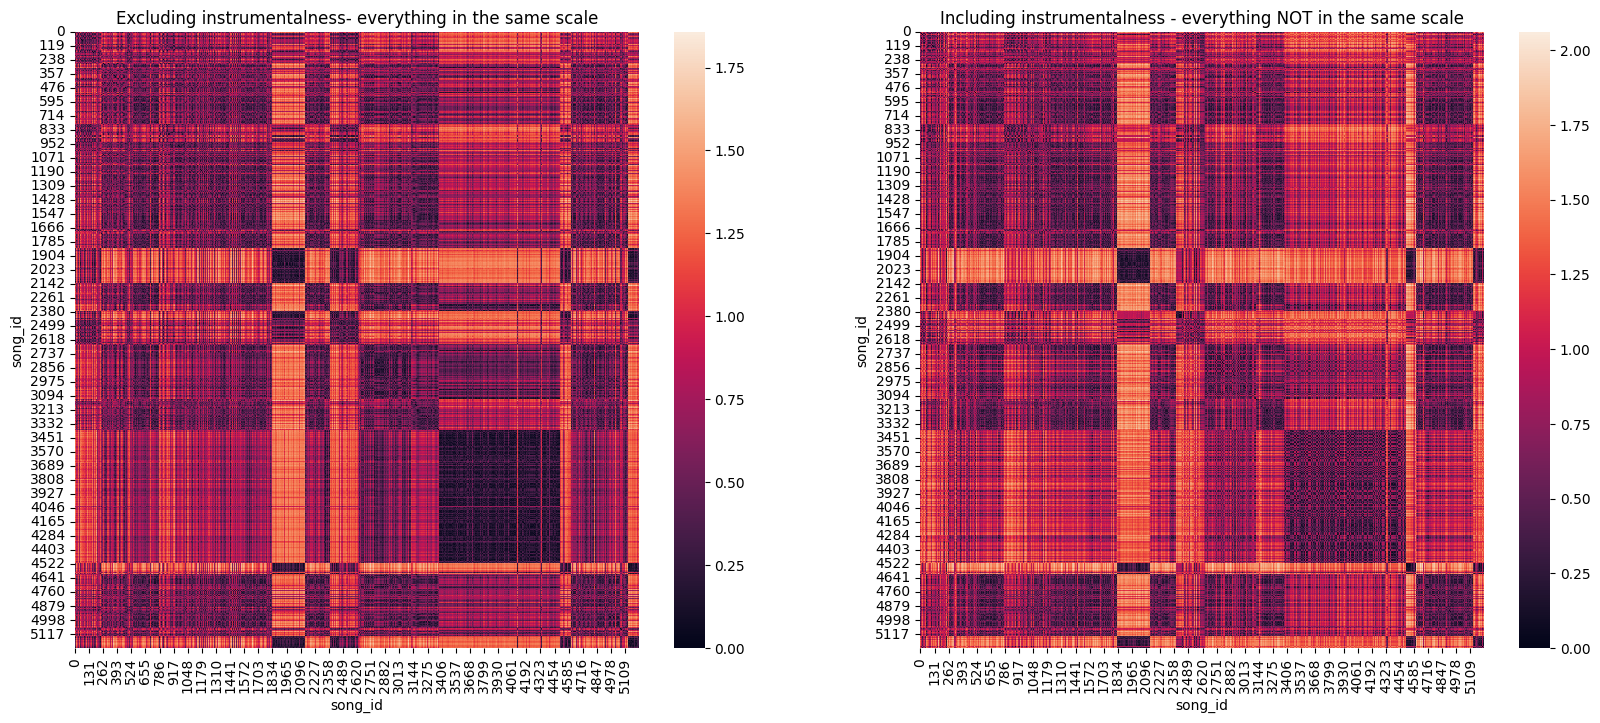

In [ ]:
#PLOT
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.heatmap(no_instrumentalness_distances_df, ax=ax1);
sns.heatmap(moosic_distances_df, ax=ax2);

# Adding titles to the plots
ax1.set_title('Excluding instrumentalness- everything in the same scale')
ax2.set_title('Including instrumentalness - everything NOT in the same scale')

plt.show()

**From this point on, Option 1 refers to the MinMax Scaler, and Option 2 to the Standard Scaler. Feel free to experiment with other scaling**

## Option 1: MinMix scaler

In [ ]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(moosic_df)
minmax_scaler.transform(moosic_df)

danceability   energy  acousticness  instrumentalness   valence
song_id                                                                 
0            0.680455  0.25900      0.696787          0.000060  0.310660
1            0.767322  0.39900      0.217871          0.000002  0.703553
2            0.880041  0.73000      0.454819          0.000064  0.918782
3            0.729059  0.05020      0.882530          0.000041  0.531980
4            0.673216  0.11900      0.919679          0.000348  0.408122
...               ...      ...           ...               ...       ...
5230         0.208893  0.06940      0.920683          0.725888  0.066497
5231         0.194416  0.10100      0.858434          0.432487  0.036041
5232         0.061634  0.00093      0.954819          0.983756  0.034924
5233         0.137539  0.02080      0.886546          0.512690  0.060000
5234         0.366081  0.04870      0.786145          0.491371  0.256853

[5235 rows x 5 columns]

In [ ]:
minmax_scaler_df=minmax_scaler.transform(moosic_df)

In [ ]:
#checking the scaling effect on for example valence
pd.DataFrame({
    'original': moosic_df.iloc[:, -1].copy(),
    'minmax_scaler': minmax_scaler_df.iloc[:, -2].copy()
}, index=moosic_df.index).sort_index()

original  minmax_scaler
song_id                         
0          0.3060       0.000060
1          0.6930       0.000002
2          0.9050       0.000064
3          0.5240       0.000041
4          0.4020       0.000348
...           ...            ...
5230       0.0655       0.725888
5231       0.0355       0.432487
5232       0.0344       0.983756
5233       0.0591       0.512690
5234       0.2530       0.491371

[5235 rows x 2 columns]

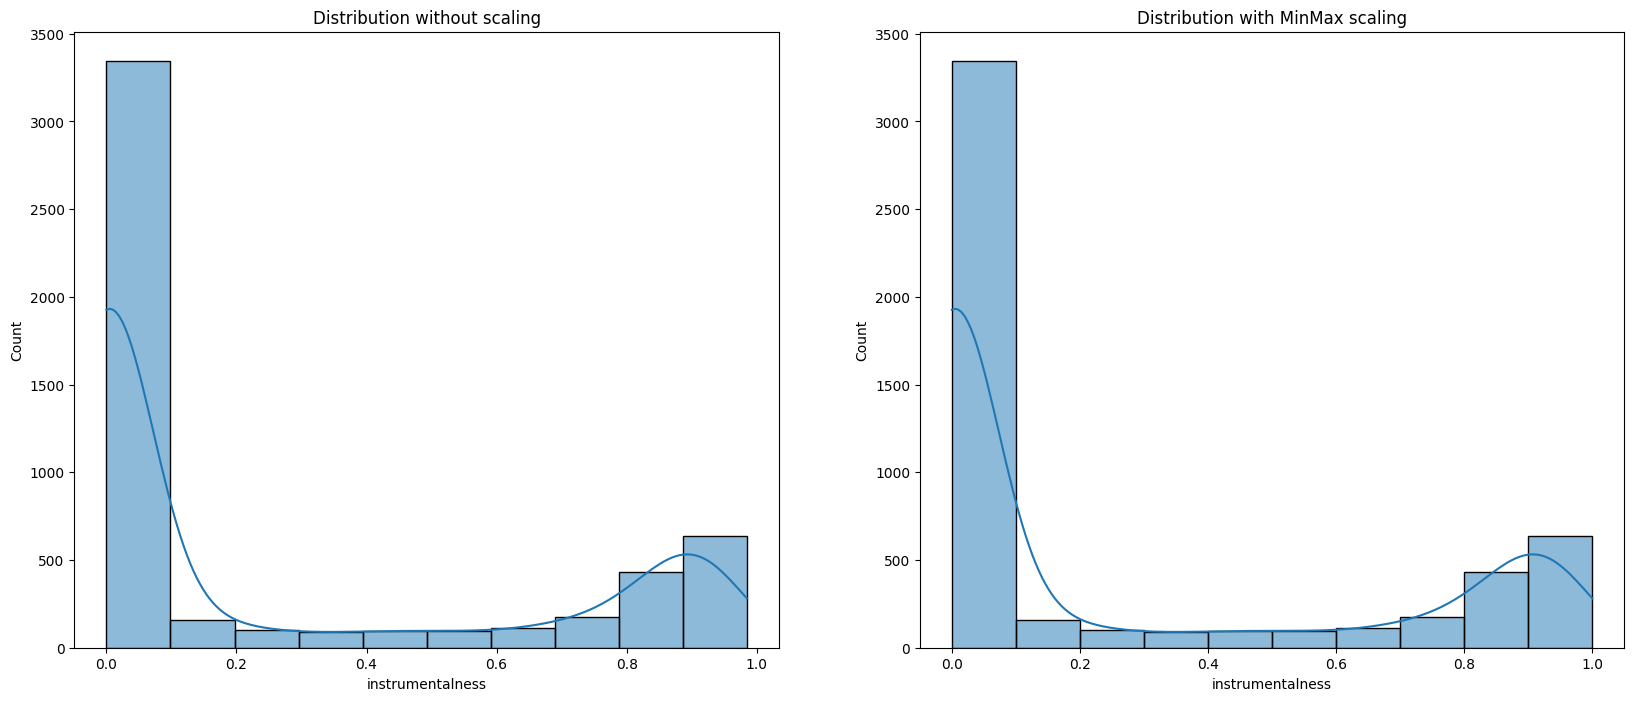

In [ ]:
# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(data=moosic_df.iloc[:,-2], bins=10, kde=True, ax=ax1);
sns.histplot(minmax_scaler_df.iloc[:,-2], bins=10, kde=True, ax=ax2);

ax1.set_title('Distribution without scaling')
ax2.set_title('Distribution with MinMax scaling')

plt.show()

In [ ]:
# Making the DataFrame for the MinMaxed heatmap
minmax_distances = pd.DataFrame(pairwise_distances(minmax_scaler_df),
                                         index=moosic_df.index,
                                         columns=moosic_df.index)

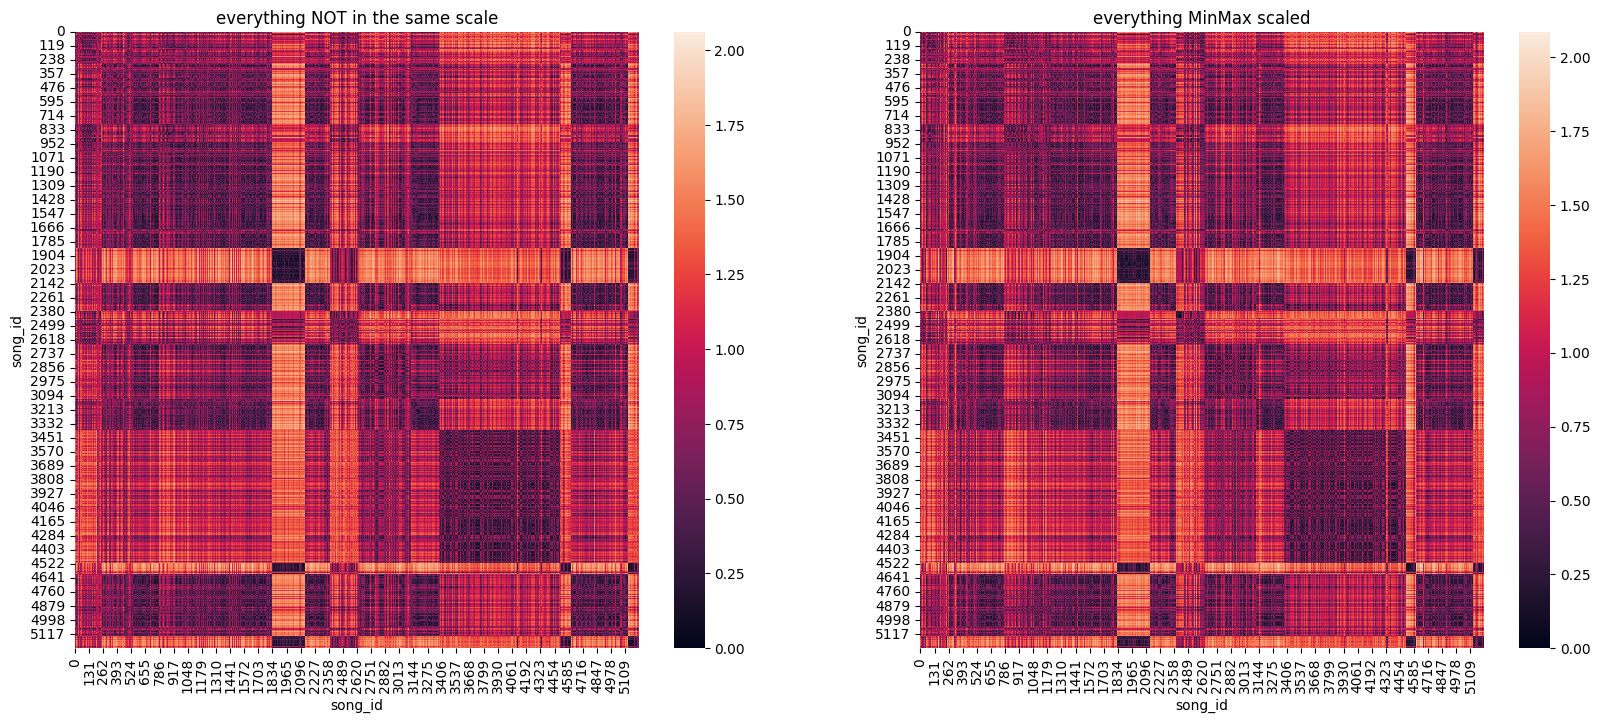

In [ ]:
# Heatmap plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(moosic_distances_df, ax=ax1);#, linewidths=.2);
sns.heatmap(minmax_distances, ax=ax2);#, linewidths=.2);

ax1.set_title('everything NOT in the same scale')
ax2.set_title('everything MinMax scaled')

plt.show()

## Option 2: Standard scaler


In [ ]:
scaler = StandardScaler()    #.set_output(transform="pandas")
all_standard = scaler.fit_transform(moosic_df)
all_standard

danceability    energy  acousticness  instrumentalness   valence
song_id                                                                  
0            0.681116 -1.368556      1.134867         -0.694125 -0.495488
1            1.066401 -0.882963     -0.205206         -0.694278  0.898109
2            1.566355  0.265117      0.457807         -0.694112  1.661526
3            0.896692 -2.092782      1.654602         -0.694174  0.289535
4            0.649009 -1.854148      1.758549         -0.693358 -0.149790
...               ...       ...           ...               ...       ...
5230        -1.410434 -2.026187      1.761359          1.234756 -1.361535
5231        -1.474648 -1.916582      1.587177          0.455047 -1.469566
5232        -2.063584 -2.263676      1.856877          1.920037 -1.473527
5233        -1.726918 -2.194757      1.665840          0.668185 -1.384582
5234        -0.713250 -2.097985      1.384902          0.611528 -0.686343

[5235 rows x 5 columns]

In [ ]:
#checking acousticness as an example
pd.DataFrame({
    'original': moosic_df.iloc[:, -3].copy(),
    'standard_scaler': all_standard.iloc[:, -3].copy()
}, index=moosic_df.index).sort_index()


original  standard_scaler
song_id                           
0           0.694         1.134867
1           0.217        -0.205206
2           0.453         0.457807
3           0.879         1.654602
4           0.916         1.758549
...           ...              ...
5230        0.917         1.761359
5231        0.855         1.587177
5232        0.951         1.856877
5233        0.883         1.665840
5234        0.783         1.384902

[5235 rows x 2 columns]

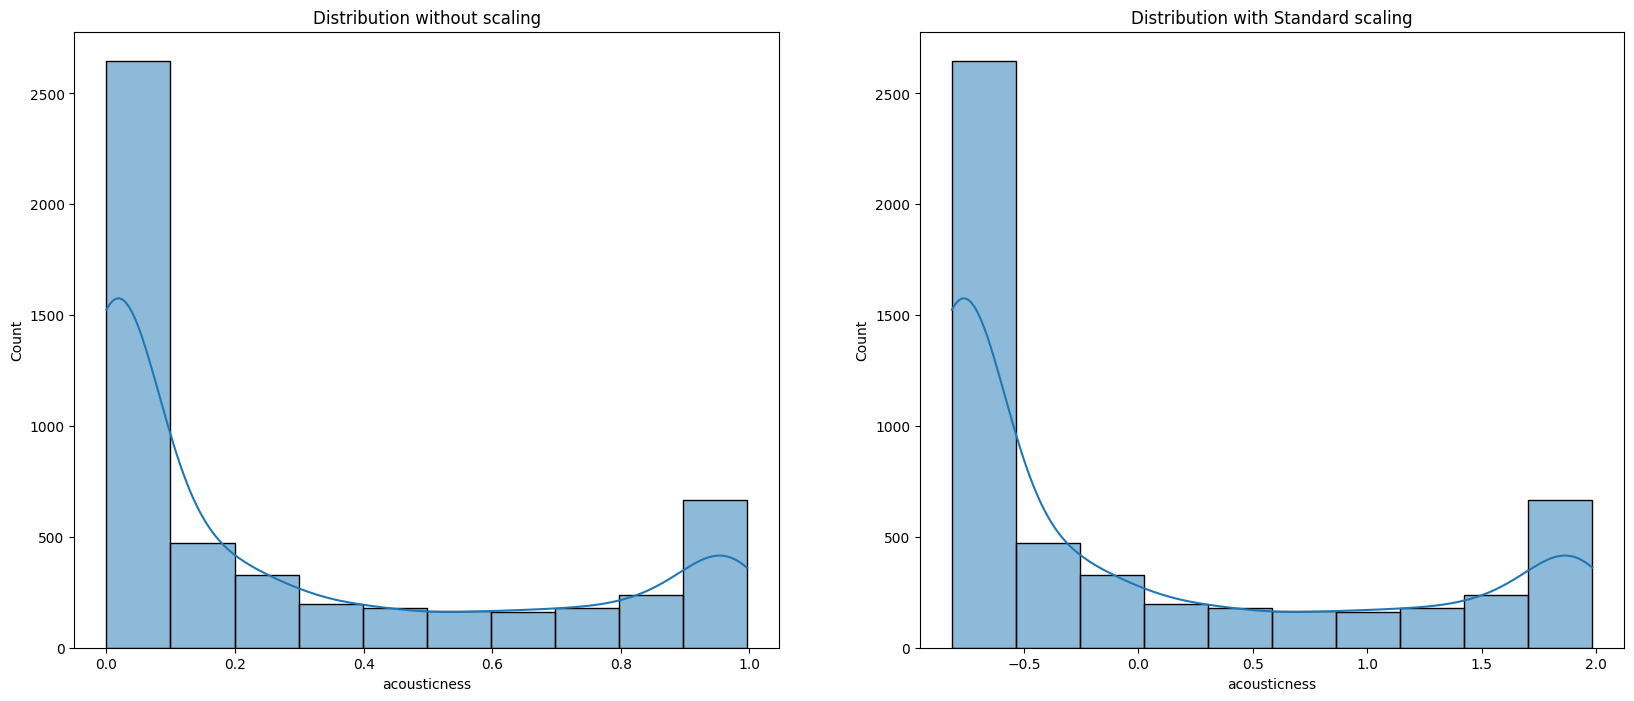

In [ ]:
# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(data=moosic_df.iloc[:,-3], bins=10, kde=True, ax=ax1);
sns.histplot(all_standard.iloc[:,-3], bins=10, kde=True, ax=ax2);

ax1.set_title('Distribution without scaling')
ax2.set_title('Distribution with Standard scaling')

plt.show()

In [ ]:
# Making the DataFrame for the Standard scaler heatmap
all_standard_distances = pd.DataFrame(pairwise_distances(all_standard),
                                           index=moosic_df.index,
                                           columns=moosic_df.index)

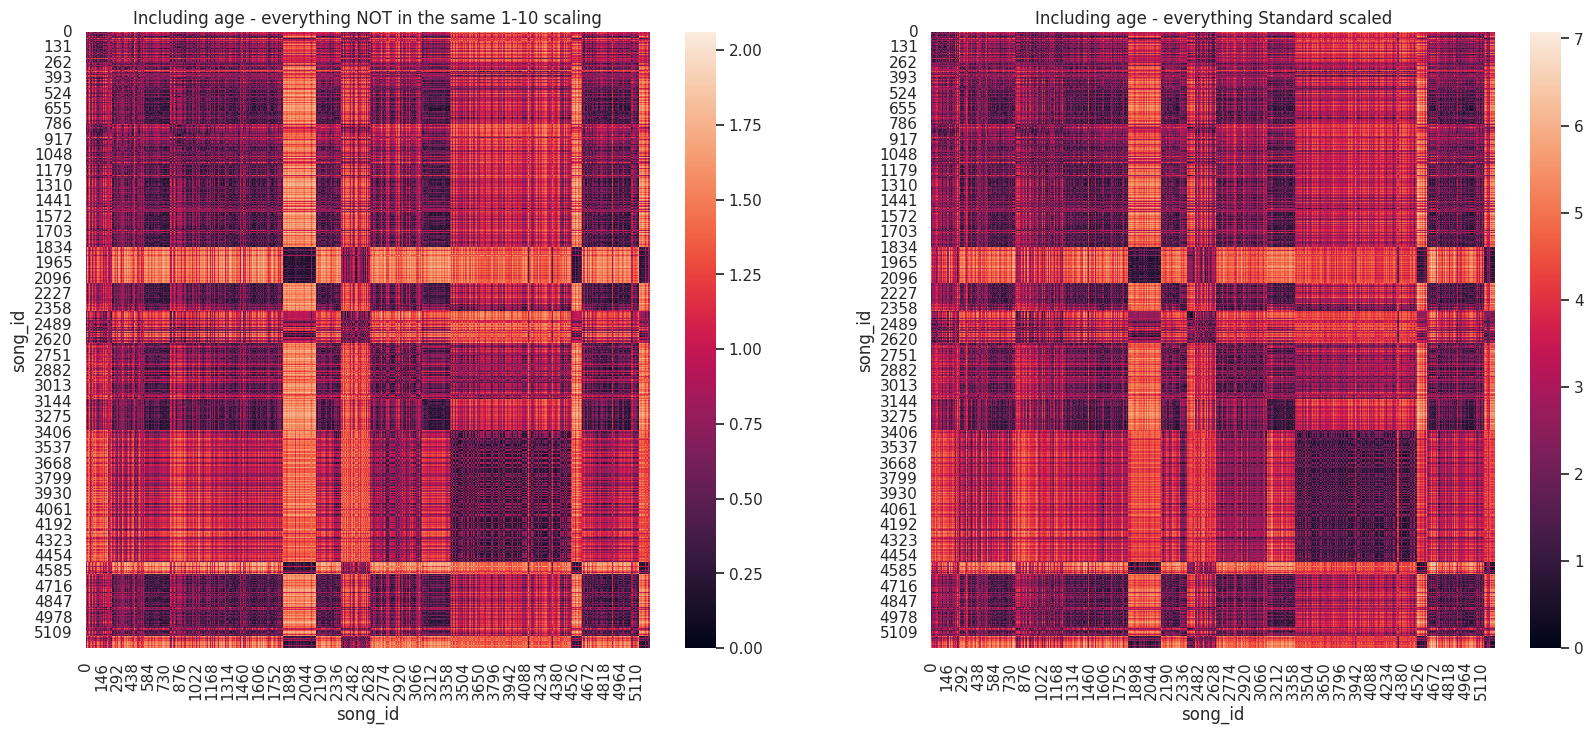

In [ ]:
# Heatmap Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(moosic_distances_df, ax=ax1);#, linewidths=.2);
sns.heatmap(all_standard_distances, ax=ax2);#, linewidths=.2);

ax1.set_title('Including all- everything NOT in the same 1-10 scaling')
ax2.set_title('Including all- everything Standard scaled')

plt.show()

# Cluster estimation
**Keep in mind that Moosic aims to offer at least 20 distinct playlists to its users. This means the clustering algorithm should ideally identify 20 or more meaningful groups within the dataset.**

## Option 1: Using MinMax scaler



### 1.1 Elbow method

In [ ]:
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k = 100

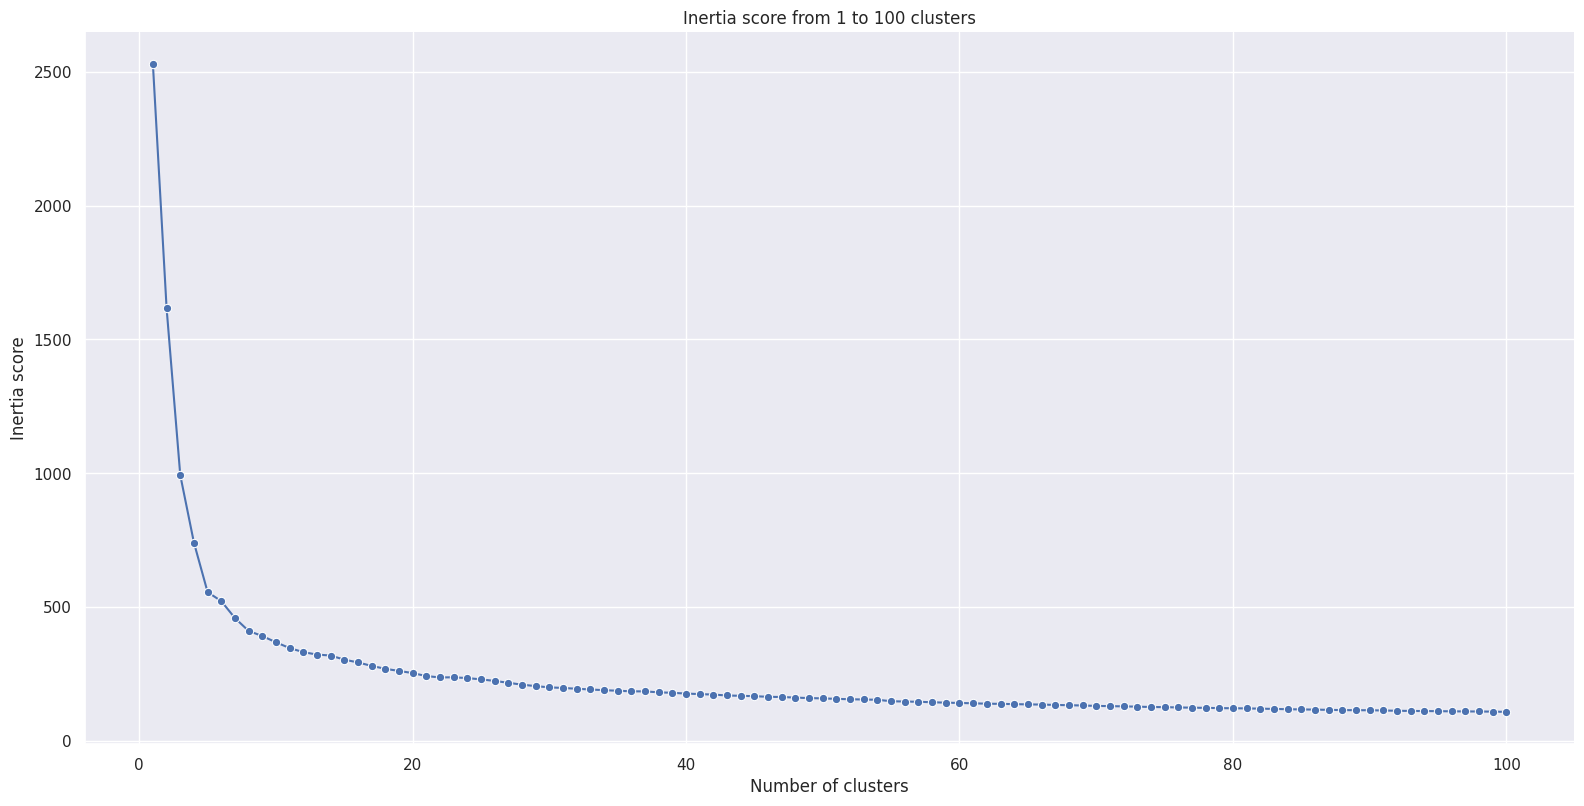

In [ ]:
# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(minmax_scaler_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

### 1.2. Silhouette score method

In [ ]:
# Create an empty list to store the silhouette scores
sil_scores = []
for j in range(2, max_k):

    # Create a K-Means object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the K-Means model to the scaled data
    kmeans.fit(minmax_scaler_df)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(minmax_scaler_df, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

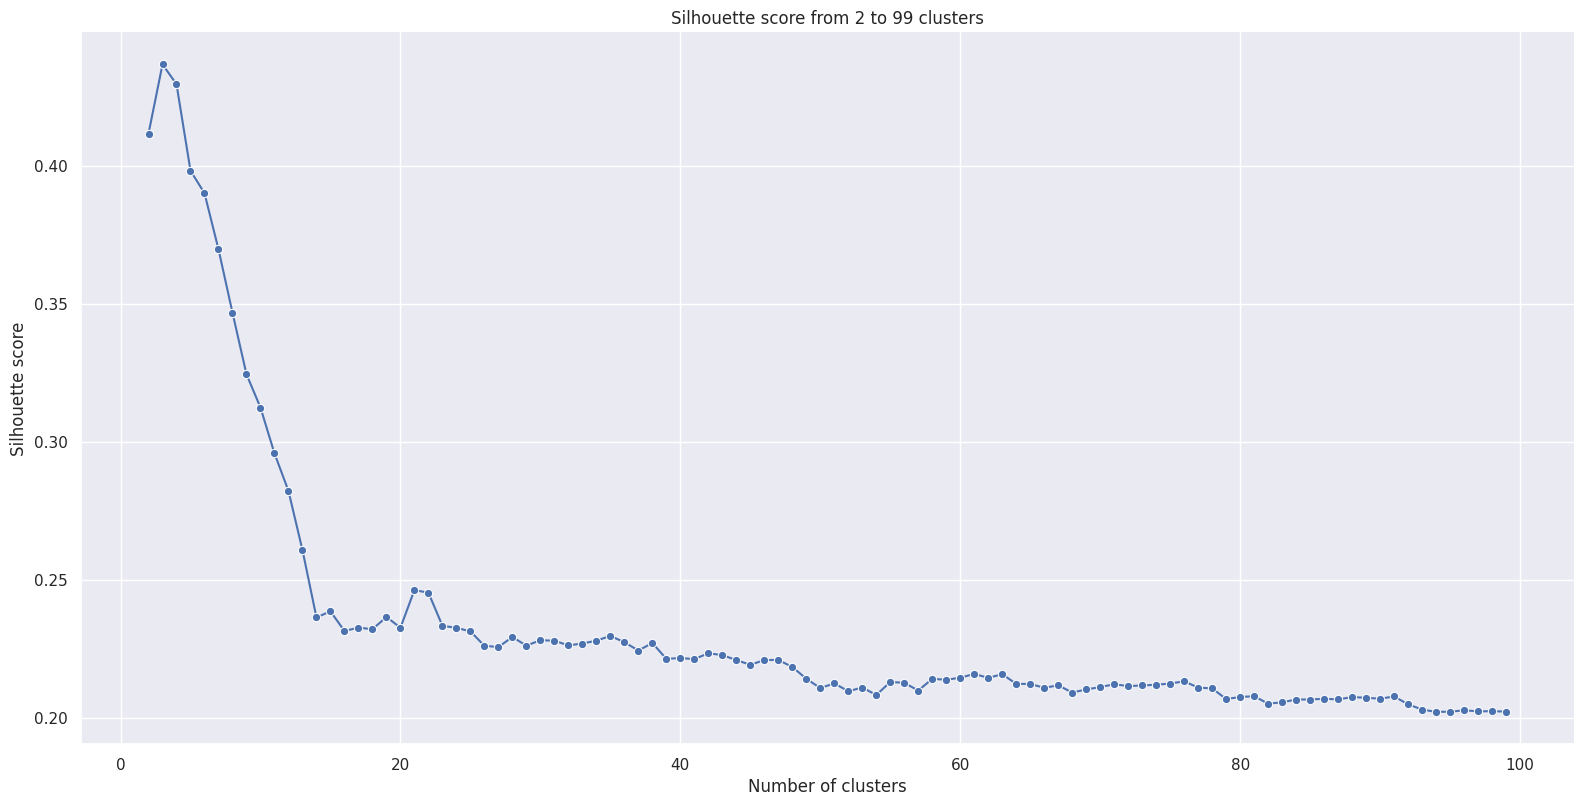

In [ ]:
(sns.relplot(y = sil_scores,
            x = range(2, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

**Although both the elbow method and the highest silhouette score suggest an optimal cluster count around 5, the project's requirements call for a minimum of 20 playlists. Therefore, we proceed with n = 20 to align with the intended user experience.**

### 1.3. K-means with MinMax scaled matrix

In [ ]:
# Initialise the model
my_kmeans = KMeans(n_clusters = 20, # type the number of k here
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(minmax_scaler_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

In [ ]:
clusters

array([17, 19,  4, ...,  2,  2,  8], dtype=int32)

In [ ]:
score = silhouette_score(minmax_scaler_df, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.23259293827239452


## Option 2: Using Standard scaler

### 2.1. Elbow method

In [ ]:
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k = 100

**The range was adjusted to 5–41 to better visualize the elbow point around 20, which aligns with the requirement of having at least 20 songs per playlist.**

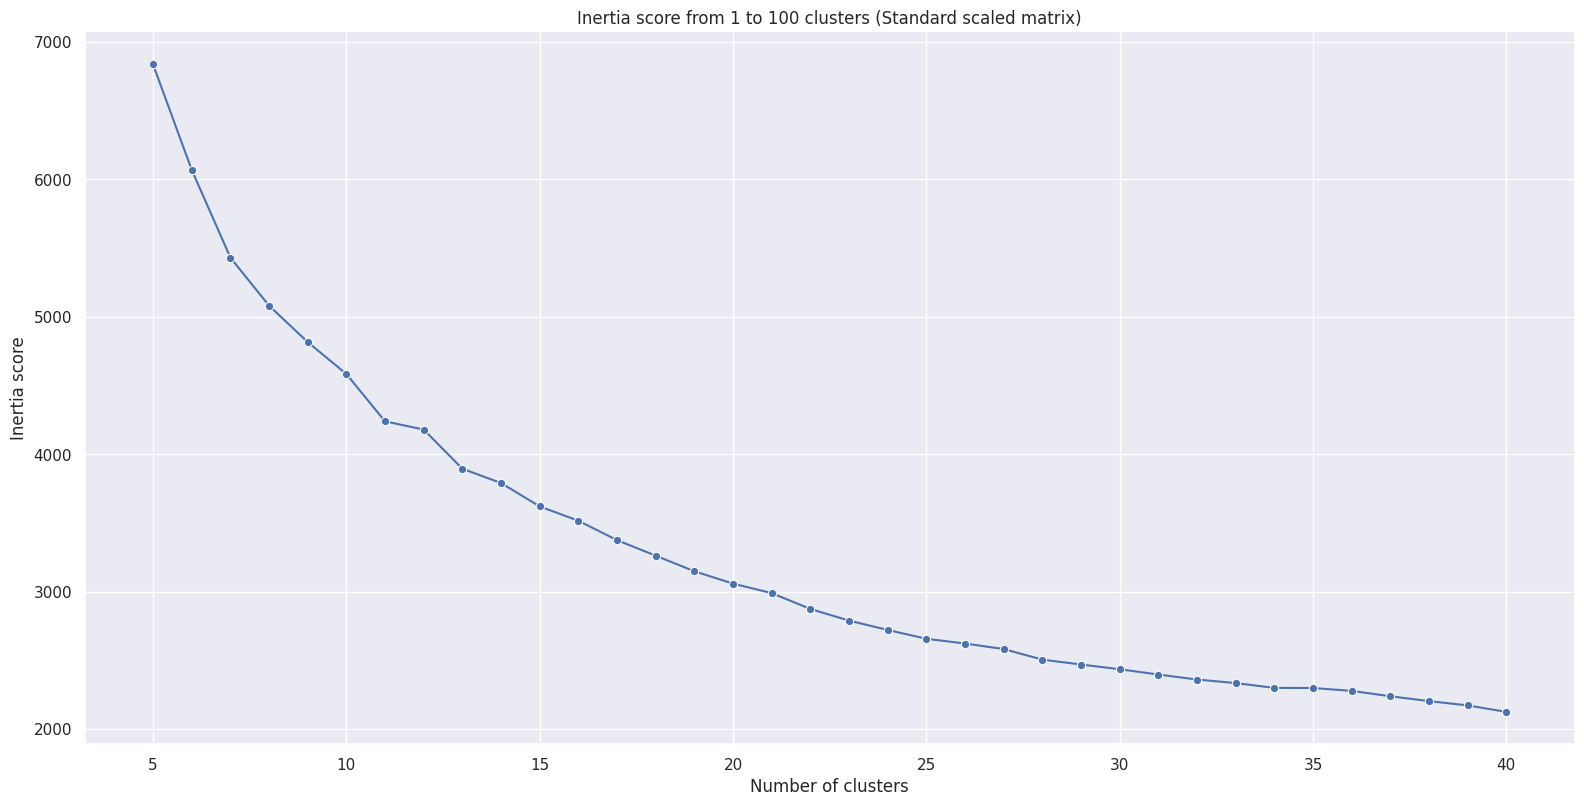

In [ ]:
# Create an empty list to store the inertia scores
inertia_list_standard = []

# Iterate over the range of cluster numbers
for i in range(5,41):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(all_standard)

    # Append the inertia score to the list
    inertia_list_standard.append(myKMeans.inertia_)

    # Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list_standard,
            x = range(5, 41),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters (Standard scaled matrix)")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

### 2.2. Silhouette score method

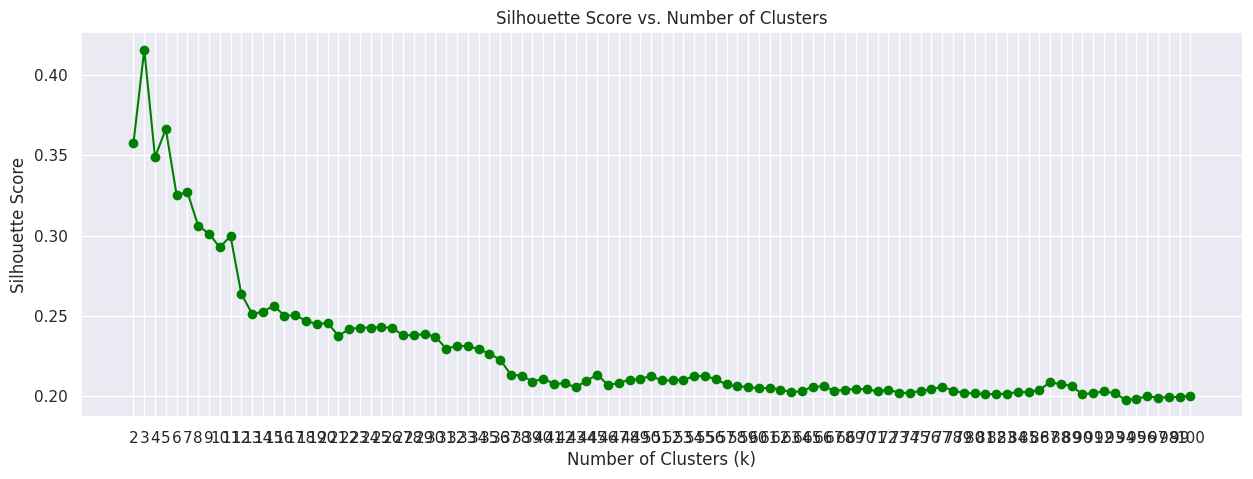

In [ ]:
silhouette_scores = []

for i in range(2, max_k + 1):  # silhouette needs at least 2 clusters
    myKMeans = KMeans(n_clusters=i, n_init="auto", random_state=seed)
    labels = myKMeans.fit_predict(all_standard)
    score = silhouette_score(all_standard, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(15,5))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(range(2, max_k + 1))
plt.show()

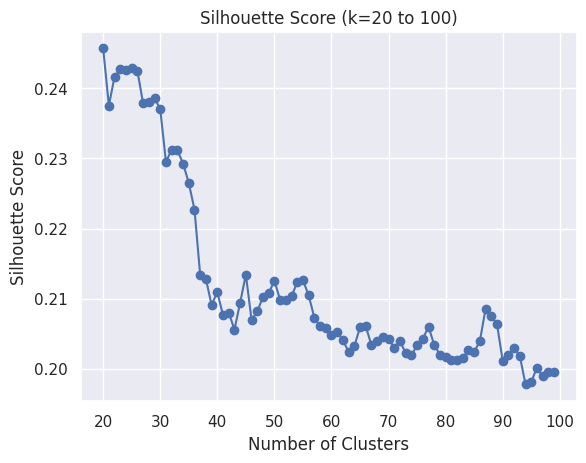

In [ ]:
# Testing the target range
silhouette_scores_standard = []
K = range(20, 100)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=seed)
    labels = kmeans.fit_predict(all_standard)
    score = silhouette_score(all_standard, labels)
    silhouette_scores_standard.append(score)

# Plot it
plt.plot(K, silhouette_scores_standard, marker='o')
plt.title('Silhouette Score (k=20 to 100)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

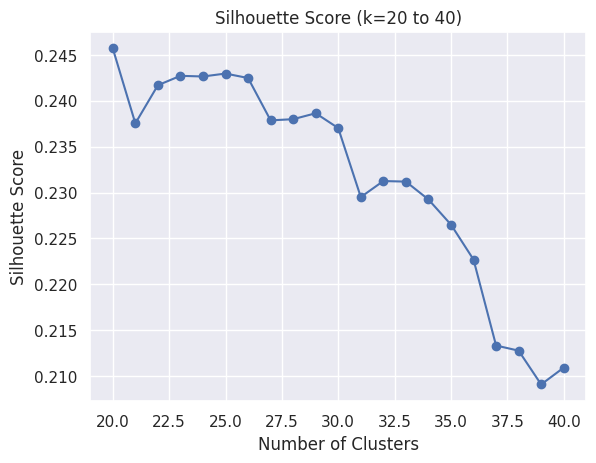

In [ ]:
# Being more precise (20 to 40)
silhouette_scores_standard2 = []
K = range(20, 41)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=seed)
    labels = kmeans.fit_predict(all_standard)
    score = silhouette_score(all_standard, labels)
    silhouette_scores_standard2.append(score)

# Plot it
plt.plot(K, silhouette_scores_standard2, marker='o')
plt.title('Silhouette Score (k=20 to 40)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

### 2.3. K-means with Standard scaled matrix

In [ ]:
all_standard1=all_standard.copy()

In [ ]:
all_standard1

danceability    energy  acousticness  instrumentalness   valence
song_id                                                                  
0            0.681116 -1.368556      1.134867         -0.694125 -0.495488
1            1.066401 -0.882963     -0.205206         -0.694278  0.898109
2            1.566355  0.265117      0.457807         -0.694112  1.661526
3            0.896692 -2.092782      1.654602         -0.694174  0.289535
4            0.649009 -1.854148      1.758549         -0.693358 -0.149790
...               ...       ...           ...               ...       ...
5230        -1.410434 -2.026187      1.761359          1.234756 -1.361535
5231        -1.474648 -1.916582      1.587177          0.455047 -1.469566
5232        -2.063584 -2.263676      1.856877          1.920037 -1.473527
5233        -1.726918 -2.194757      1.665840          0.668185 -1.384582
5234        -0.713250 -2.097985      1.384902          0.611528 -0.686343

[5235 rows x 5 columns]

In [ ]:
# Initialise the model
my_kmeans = KMeans(n_clusters = 20,
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(all_standard1)

# Obtain the cluster output
clusters = my_kmeans.labels_


In [ ]:
clusters

array([15,  8,  8, ...,  2,  2, 12], dtype=int32)

In [ ]:
score = silhouette_score(all_standard1, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.24569695786884782


**I proceeded with the standardized data to continue building the playlists.**

In [ ]:
# Attach the cluster output to our original DataFrame
all_standard1["playlist_id_kmeans"] = clusters

In [ ]:
all_standard1.groupby(by="playlist_id_kmeans").mean()

danceability    energy  acousticness  instrumentalness  \
playlist_id_kmeans                                                           
0                      -1.082847  0.787379     -0.791274          1.552549   
1                       1.123181  0.014272     -0.513082         -0.665589   
2                      -1.477497 -1.863343      1.787639          1.620286   
3                      -1.086911  1.029887     -0.798238         -0.524170   
4                       0.353582 -0.226782      1.159698         -0.630850   
5                      -0.802089 -1.626394      1.663595         -0.567219   
6                       0.438313  0.632549     -0.663399         -0.630107   
7                       0.523809  0.646486     -0.582822         -0.653733   
8                       0.978413 -0.091861      0.272111         -0.660052   
9                      -0.117907 -0.358903     -0.380011         -0.652907   
10                     -1.118896  0.860083     -0.793179          0.559378   
11                     -1.322665  0.936926     -0.788674          1.605617   
12                     -0.411925 -1.861801      1.869308          1.682690   
13                      0.544713  0.499856     -0.535931          1.234009   
14                      0.154174 -0.228388      0.427273         -0.652421   
15                      0.432281 -1.214066      1.351384         -0.609299   
16                      0.568291  0.561710     -0.663400          1.351033   
17                     -0.578450  0.688528     -0.691324         -0.557374   
18                      1.366061  0.241894     -0.505264         -0.670927   
19                      0.394212 -1.137004      1.491821          1.436751   

                     valence  
playlist_id_kmeans            
0                  -0.198796  
1                   0.262808  
2                  -1.310029  
3                  -1.025506  
4                   1.348764  
5                  -0.896348  
6                  -0.457335  
7                   1.040294  
8                   1.367245  
9                  -0.763744  
10                 -0.884414  
11                 -1.111467  
12                 -0.904278  
13                  1.241037  
14                  0.202387  
15                  0.073915  
16                 -0.580797  
17                  0.242201  
18                  1.393037  
19                  0.458627

In [ ]:
print(all_standard1.columns)

Index(['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence',
       'playlist_id_kmeans'],
      dtype='object')


**Radar Chart of Cluster Profiles**

In [ ]:
# Create an empty list to store the Scatterpolar object of each cluster
scatter_objects = []

# State the label for each arm of the chart
categories = all_standard1.columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(all_standard1['playlist_id_kmeans'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [all_standard1.loc[all_standard1["playlist_id_kmeans"] == cluster, all_standard.columns[0]].mean(),
                    all_standard1.loc[all_standard1["playlist_id_kmeans"] == cluster, all_standard1.columns[1]].mean(),
                    all_standard1.loc[all_standard1["playlist_id_kmeans"] == cluster, all_standard1.columns[2]].mean(),
                    all_standard1.loc[all_standard1["playlist_id_kmeans"] == cluster, all_standard1.columns[3]].mean(),
                    all_standard1.loc[all_standard1["playlist_id_kmeans"] == cluster, all_standard1.columns[4]].mean(),
                    all_standard1.loc[all_standard1["playlist_id_kmeans"] == cluster, all_standard1.columns[5]].mean()
                  ]


  # Create a Scatterpolar object for the cluster
  cluster_scatter = go.Scatterpolar(
    r = cluster_means, # set the radial coordinates
    theta = categories, # the names of the columns
    fill = 'toself', # fills in the space with colour
    name = f'Cluster {cluster}' # adds the name of the cluster
  )

  # Add the Scatterpolar object to the list
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart',
  height = 600,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True, # visibility of the numbers on the arm
      range = [0, 1] # scale of the plot
    )),
  showlegend = True
)

# Show the initialised plot and the trace objects
fig.show()

## Option 3: Dimensionality Reduction with PCA Before K-Means Clustering


In [ ]:
all_standard2=all_standard.copy()
all_standard2

danceability    energy  acousticness  instrumentalness   valence
song_id                                                                  
0            0.681116 -1.368556      1.134867         -0.694125 -0.495488
1            1.066401 -0.882963     -0.205206         -0.694278  0.898109
2            1.566355  0.265117      0.457807         -0.694112  1.661526
3            0.896692 -2.092782      1.654602         -0.694174  0.289535
4            0.649009 -1.854148      1.758549         -0.693358 -0.149790
...               ...       ...           ...               ...       ...
5230        -1.410434 -2.026187      1.761359          1.234756 -1.361535
5231        -1.474648 -1.916582      1.587177          0.455047 -1.469566
5232        -2.063584 -2.263676      1.856877          1.920037 -1.473527
5233        -1.726918 -2.194757      1.665840          0.668185 -1.384582
5234        -0.713250 -2.097985      1.384902          0.611528 -0.686343

[5235 rows x 5 columns]

In [ ]:
pca = PCA()
moosic_pca1 = pca.fit_transform(all_standard2)
moosic_pca1

pca0      pca1      pca2      pca3      pca4
song_id                                                  
0       -0.514348 -1.762129 -0.815043  0.562949  0.035317
1        1.056117 -1.249225  0.065638  0.282152 -0.698356
2        1.847676 -1.366628  0.652199 -0.110179  0.506679
3       -0.484495 -2.825556 -0.404452  0.249493 -0.207079
4       -0.775839 -2.515192 -0.673977  0.263624  0.053795
...           ...       ...       ...       ...       ...
5230    -3.379943 -1.028712 -0.169410 -0.092673 -0.236614
5231    -2.980910 -0.982732 -0.865246 -0.227312 -0.285979
5232    -4.209848 -0.789168  0.184653 -0.342637 -0.437406
5233    -3.297416 -1.078283 -0.714529 -0.392747 -0.487151
5234    -2.285451 -1.463214 -0.177455 -0.012865 -0.526608

[5235 rows x 5 columns]

In [ ]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_
explained_variance_array

array([0.47525092, 0.33160271, 0.10265498, 0.06336682, 0.02712457])

### 3.1. Elbow method

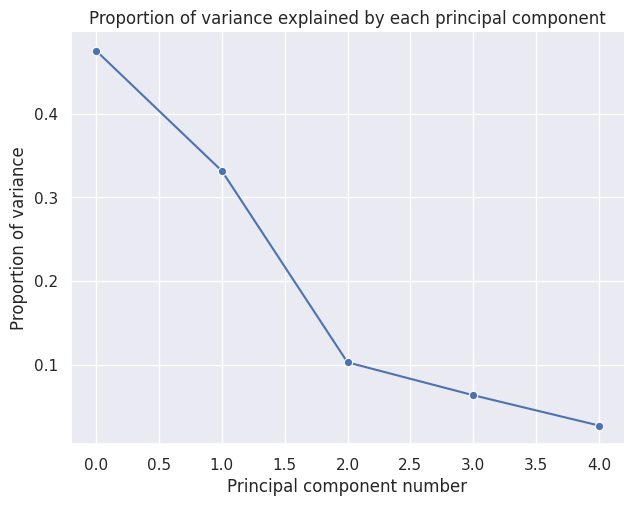

In [ ]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

(
  # Create a line chart with sns.relplot
  sns.relplot(
      kind = 'line',
      data = explained_variance_array_df,
      x = explained_variance_array_df.index,
      y = "Variance explained",
      marker = 'o',
      aspect = 1.3)
  # Set the title of the plot
  .set(title = "Proportion of variance explained by each principal component")
  # Set the axis labels
  .set_axis_labels("Principal component number", "Proportion of variance")
);

In [ ]:
elbow = 2

In [ ]:
# Create a PCA object using the number of components defined by the 'elbow' point
# We add 1 because Python indexing starts at 0, but component counts start at 1
pca_elbow = PCA(n_components=elbow + 1)

# Fit the PCA model to the standardized feature set and transform the data
pca_elbow_df = pca_elbow.fit_transform(all_standard2)

# The resulting 'pca_elbow_df' now contains the principal components
# representing the reduced-dimensional version of the original data
pca_elbow_df

pca0      pca1      pca2
song_id                              
0       -0.514348 -1.762129 -0.815043
1        1.056117 -1.249225  0.065638
2        1.847676 -1.366628  0.652199
3       -0.484495 -2.825556 -0.404452
4       -0.775839 -2.515192 -0.673977
...           ...       ...       ...
5230    -3.379943 -1.028712 -0.169410
5231    -2.980910 -0.982732 -0.865246
5232    -4.209848 -0.789168  0.184653
5233    -3.297416 -1.078283 -0.714529
5234    -2.285451 -1.463214 -0.177455

[5235 rows x 3 columns]

### 3.2. Silhouette score method

**Cumulative explained variance**

In [ ]:
cumulative_sum_of_variance = np.cumsum(explained_variance_array)
cumulative_sum_of_variance

array([0.47525092, 0.80685363, 0.90950861, 0.97287543, 1.        ])

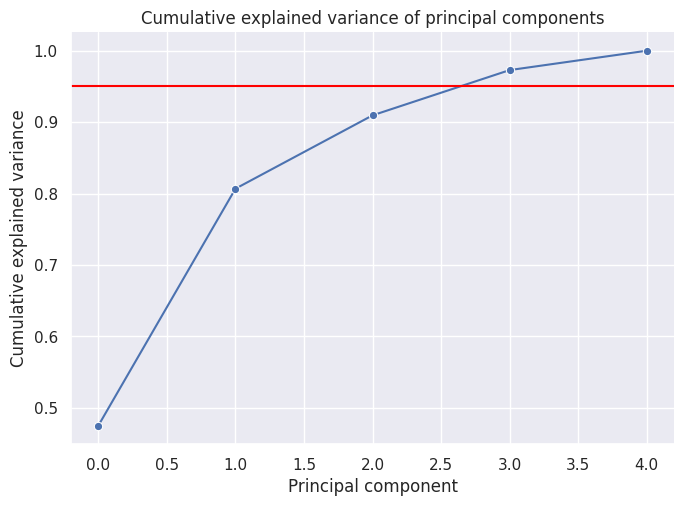

In [ ]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red');

In [ ]:
n_components = 3
pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(all_standard2)

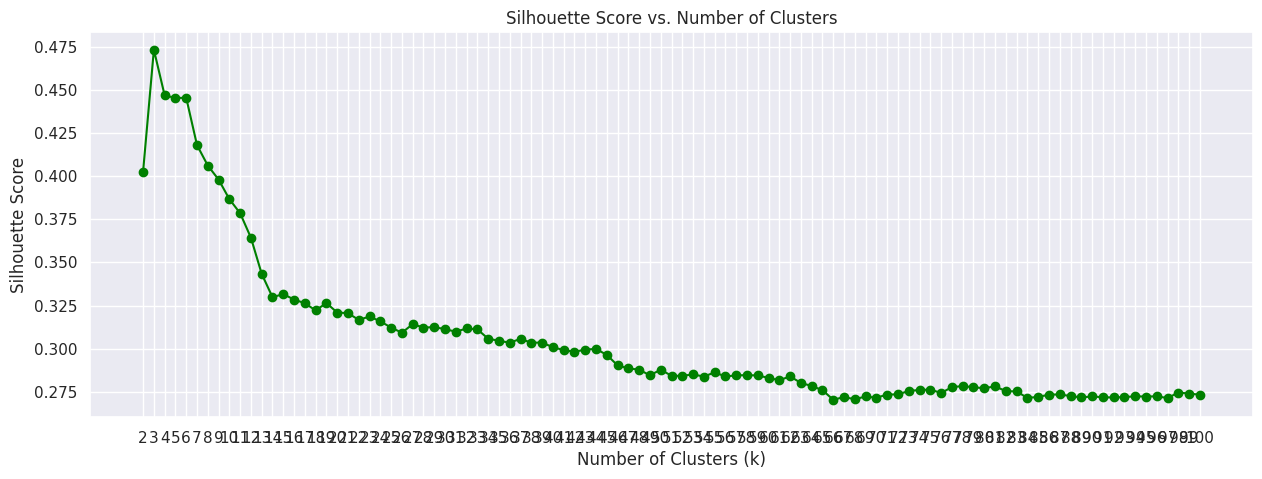

In [ ]:
kmax = 100
silhouette_scores = []

for i in range(2, kmax + 1):  # silhouette needs at least 2 clusters
    myKMeans = KMeans(n_clusters=i, n_init="auto", random_state=seed)
    labels = myKMeans.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(15,5))
plt.plot(range(2, kmax + 1), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(range(2, kmax + 1))
plt.show()

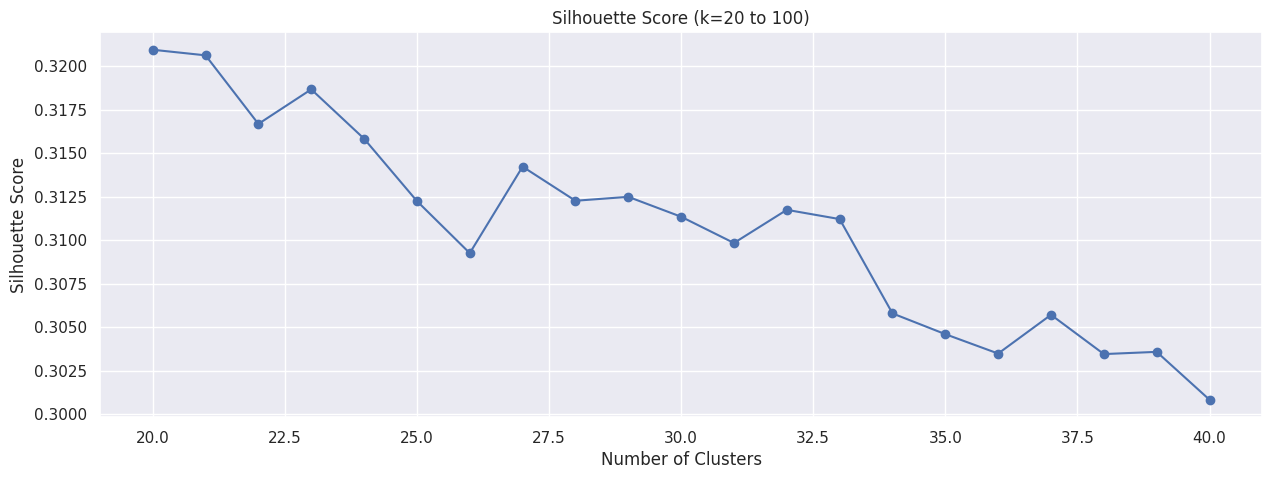

In [ ]:
# Testing the target range
silhouette_scores = []
K = range(20, 41)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=seed)
    labels = kmeans.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, labels)
    silhouette_scores.append(score)

# Plot it
plt.figure(figsize=(15,5))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score (k=20 to 100)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

### 3.3. K-means

In [ ]:
k = 20
kmeans = KMeans(n_clusters=k,  random_state=123)
labels_pca = kmeans.fit_predict(X_reduced)

In [ ]:
labels_pca
score = silhouette_score(X_reduced, labels_pca)
print("Silhouette Score:", score)

Silhouette Score: 0.3209396678531186


# Building the playlist

In [ ]:
moosic_df1=moosic_df.copy()
moosic_df1["playlist_id"] = labels_pca
moosic_df1.head()

danceability  energy  acousticness  instrumentalness  valence  \
song_id                                                                  
0               0.658  0.2590         0.694          0.000059    0.306   
1               0.742  0.3990         0.217          0.000002    0.693   
2               0.851  0.7300         0.453          0.000063    0.905   
3               0.705  0.0502         0.879          0.000041    0.524   
4               0.651  0.1190         0.916          0.000343    0.402   

         playlist_id  
song_id               
0                  8  
1                 11  
2                  6  
3                  8  
4                  8

**Reviewing cluster feature averages to assign meaningful playlist names based on their audio profiles**

In [ ]:
playlist_summary = moosic_df1.groupby("playlist_id").mean()[[ "danceability","energy", "acousticness","instrumentalness", "valence"]]
playlist_summary

danceability    energy  acousticness  instrumentalness   valence
playlist_id                                                                  
0                0.416516  0.859773      0.021832          0.834398  0.408066
1                0.657679  0.612423      0.273222          0.008893  0.564953
2                0.200923  0.113758      0.929631          0.865111  0.071896
3                0.704677  0.817426      0.072260          0.010205  0.740597
4                0.500126  0.801245      0.051928          0.019171  0.293811
5                0.194575  0.928027      0.008794          0.847735  0.102393
6                0.791034  0.697275      0.197618          0.007478  0.846705
7                0.334897  0.165175      0.902631          0.056361  0.175520
8                0.579715  0.306808      0.771583          0.034131  0.477988
9                0.608048  0.814506      0.058319          0.009721  0.517313
10               0.417347  0.123486      0.950632          0.877219  0.219767
11               0.673785  0.517190      0.602934          0.022314  0.793781
12               0.315540  0.895397      0.008765          0.560008  0.259231
13               0.272269  0.944786      0.003709          0.057783  0.166191
14               0.654870  0.800649      0.098102          0.739182  0.742649
15               0.258304  0.899031      0.006003          0.873055  0.266728
16               0.539182  0.846247      0.041159          0.423208  0.471831
17               0.608765  0.346956      0.797029          0.766397  0.571515
18               0.476593  0.525711      0.398786          0.021758  0.294345
19               0.230096  0.923500      0.005234          0.391844  0.123071

In [ ]:
# Custom vibe names (manually defined for each playlist_id)
playlist_names = {
    0: "Epic Electro Escapes",
    1: "Groove & Flow",
    2: "Ambient Forest",
    3: "Feel Good Rush",
    4: "Moody Motion",
    5: "Glitch Rage",
    6: "Sunbeam Bounce",
    7: "Lowkey & Lost",
    8: "Indie Café",
    9: "Groove Machine",
    10: "Peaceful Spaces",
    11: "Dream Pop Drift",
    12: "Bassline Blaze",
    13: "Electro Frenzy",
    14: "Feelgood Pulse",
    15: "Digital Drift",
    16: "Alt Boost",
    17: "Uplifted & Unplugged",
    18: "Wavy Tides",
    19: "Shadow Rave"
}


# Add to summary
playlist_summary["playlist_name"] = playlist_summary.index.map(playlist_names)
playlist_summary

danceability    energy  acousticness  instrumentalness   valence  \
playlist_id                                                                     
0                0.416516  0.859773      0.021832          0.834398  0.408066   
1                0.657679  0.612423      0.273222          0.008893  0.564953   
2                0.200923  0.113758      0.929631          0.865111  0.071896   
3                0.704677  0.817426      0.072260          0.010205  0.740597   
4                0.500126  0.801245      0.051928          0.019171  0.293811   
5                0.194575  0.928027      0.008794          0.847735  0.102393   
6                0.791034  0.697275      0.197618          0.007478  0.846705   
7                0.334897  0.165175      0.902631          0.056361  0.175520   
8                0.579715  0.306808      0.771583          0.034131  0.477988   
9                0.608048  0.814506      0.058319          0.009721  0.517313   
10               0.417347  0.123486      0.950632          0.877219  0.219767   
11               0.673785  0.517190      0.602934          0.022314  0.793781   
12               0.315540  0.895397      0.008765          0.560008  0.259231   
13               0.272269  0.944786      0.003709          0.057783  0.166191   
14               0.654870  0.800649      0.098102          0.739182  0.742649   
15               0.258304  0.899031      0.006003          0.873055  0.266728   
16               0.539182  0.846247      0.041159          0.423208  0.471831   
17               0.608765  0.346956      0.797029          0.766397  0.571515   
18               0.476593  0.525711      0.398786          0.021758  0.294345   
19               0.230096  0.923500      0.005234          0.391844  0.123071   

                    playlist_name  
playlist_id                        
0            Epic Electro Escapes  
1                   Groove & Flow  
2                  Ambient Forest  
3                  Feel Good Rush  
4                    Moody Motion  
5                     Glitch Rage  
6                  Sunbeam Bounce  
7                   Lowkey & Lost  
8                      Indie Café  
9                  Groove Machine  
10                Peaceful Spaces  
11                Dream Pop Drift  
12                 Bassline Blaze  
13                 Electro Frenzy  
14                 Feelgood Pulse  
15                  Digital Drift  
16                      Alt Boost  
17           Uplifted & Unplugged  
18                     Wavy Tides  
19                    Shadow Rave

**Map cluster labels in moosic_df1 to their corresponding playlist names**

In [ ]:
moosic_df1["playlist_name"] = moosic_df1["playlist_id"].map(playlist_summary["playlist_name"])
moosic_df1.head()

danceability  energy  acousticness  instrumentalness  valence  \
song_id                                                                  
0               0.658  0.2590         0.694          0.000059    0.306   
1               0.742  0.3990         0.217          0.000002    0.693   
2               0.851  0.7300         0.453          0.000063    0.905   
3               0.705  0.0502         0.879          0.000041    0.524   
4               0.651  0.1190         0.916          0.000343    0.402   

         playlist_id      PCA1      PCA2    playlist_name  
song_id                                                    
0                  8 -0.514348 -1.762129       Indie Café  
1                 11  1.056117 -1.249225  Dream Pop Drift  
2                  6  1.847676 -1.366628   Sunbeam Bounce  
3                  8 -0.484495 -2.825556       Indie Café  
4                  8 -0.775839 -2.515192       Indie Café

# Cluster visualization



## Plot the K-Means clusters using the first two PCA components

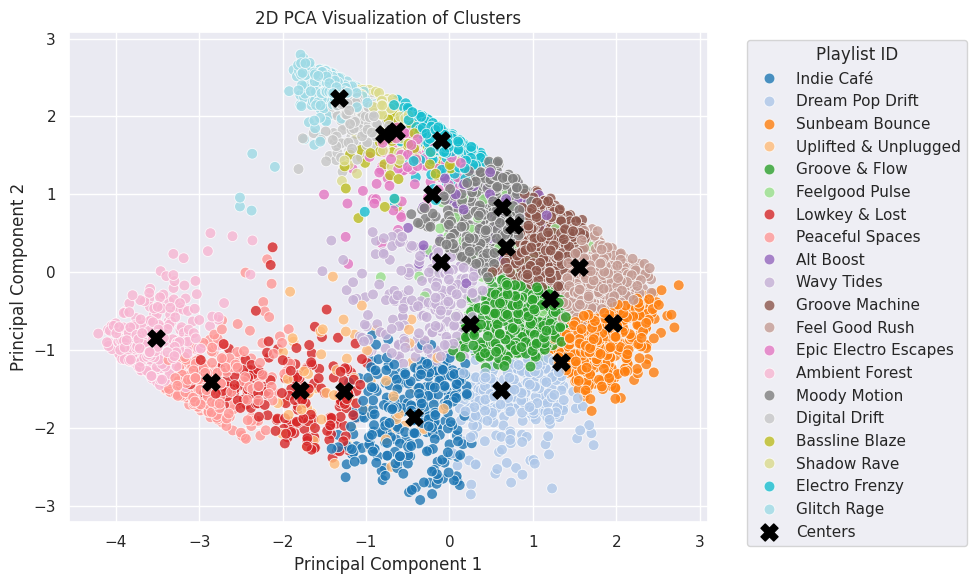

In [ ]:
# Reduce to 2D with PCA (just for plotting)
pca_2d = PCA(n_components=2)
X_reduced_2d = pca_2d.fit_transform(all_standard)

# Fit KMeans on original standardized data
k = 20
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=123)
labels = kmeans.fit_predict(all_standard)

# Convert cluster centers into a DataFrame with correct column names
cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=all_standard.columns)

# Now transform cluster centers into PCA space
centers_2d = pca_2d.transform(cluster_centers_df)

# Add the 2D PCA components to your DataFrame
moosic_df1["PCA1"] = X_reduced_2d.iloc[:, 0]
moosic_df1["PCA2"] = X_reduced_2d.iloc[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=moosic_df1,
    x="PCA1", y="PCA2",
    hue="playlist_name",
    palette="tab20",
    s=60,
    alpha=0.8,
    legend="full"
)
# Plot cluster centers
plt.scatter(
    centers_2d.iloc[:, 0], centers_2d.iloc[:, 1],
    c='black',
    s=150,
    marker='X',
    label='Centers'
)

plt.title("2D PCA Visualization of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title="Playlist ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
print("X_pca shape:", X_reduced_2d.shape)
print("Cluster centers shape:", kmeans.cluster_centers_.shape)
print("Centers in PCA shape:", centers_2d.shape)

X_pca shape: (5235, 2)
Cluster centers shape: (20, 5)
Centers in PCA shape: (20, 2)


## Heatmap

In [ ]:
all_standard3=all_standard.copy()
all_standard3["playlist_id"] = labels_pca
all_standard3.head()

danceability    energy  acousticness  instrumentalness   valence  \
song_id                                                                     
0            0.681116 -1.368556      1.134867         -0.694125 -0.495488   
1            1.066401 -0.882963     -0.205206         -0.694278  0.898109   
2            1.566355  0.265117      0.457807         -0.694112  1.661526   
3            0.896692 -2.092782      1.654602         -0.694174  0.289535   
4            0.649009 -1.854148      1.758549         -0.693358 -0.149790   

         playlist_id  
song_id               
0                  8  
1                 11  
2                  6  
3                  8  
4                  8

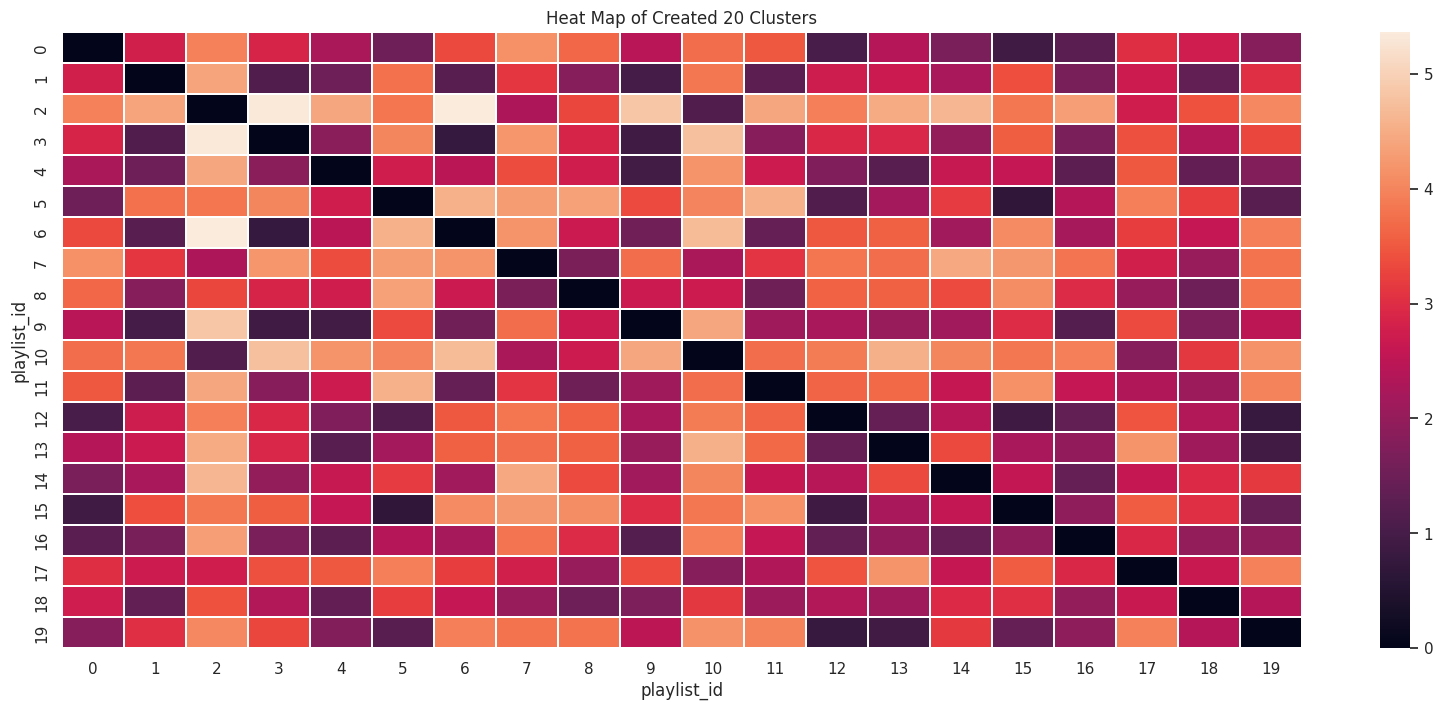

In [ ]:
# Creating the pairwise distance DataFrame
all_standard_difference = pd.DataFrame(
    pairwise_distances(all_standard3.groupby('playlist_id').mean()),
    index=all_standard3.groupby('playlist_id').mean().index,
    columns=all_standard3.groupby('playlist_id').mean().index
)

# Creating the figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(20, 8))

# Plotting the heatmap
sns.heatmap(all_standard_difference, linewidths=0.2, ax=ax1)

# Adding title to the plot
ax1.set_title('Heat Map of Created 20 Clusters')

# Display the plot
plt.show()

# Final dataset

In [ ]:
moosic_htlm=moosic_df_original[['song_id', 'name', 'artist', 'html']]
moosic_htlm

song_id                                               name  \
0           0  Se Eu Quiser Falar Com Deus                   ...   
1           1  Saudade De Bahia                              ...   
2           2  Canta Canta, Minha Gente                      ...   
3           3  Mulher Eu Sei                                 ...   
4           4  Rosa Morena                                   ...   
...       ...                                                ...   
5230     5230  1812 Festival Overture, Op. 49: 1812 Overture,...   
5231     5231  Winter Fragments pour ensemble instrumental, s...   
5232     5232  Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...   
5233     5233  Serenade For Strings In E, Op.22, B. 52: 1. Mo...   
5234     5234  Ravel: BolÃ©ro, M. 81                         ...   

                                                 artist  \
0      Gilberto Gil                                       
1     AntÃ´nio Carlos Jobim                               
2      Martinho Da Vila                                   
3     Chico CÃ©sar                                        
4      Kurt Elling                                        
...                                                 ...   
5230   Pyotr Ilyich Tchaikovsky                           
5231   Tristan Murail                                     
5232   Arnold Schoenberg                                  
5233  AntonÃ­n DvoÅÃ¡k                             ...   
5234   Maurice Ravel                                      

                                                   html  
0     https://open.spotify.com/track/1n7JnwviZ7zf0LR...  
1     https://open.spotify.com/track/5QGM1U0eCYrQuwS...  
2     https://open.spotify.com/track/0NLIFSZxPzQhCwn...  
3     https://open.spotify.com/track/3mXqOdlLE1k67Ws...  
4     https://open.spotify.com/track/7bSzjzjTkWT2CkI...  
...                                                 ...  
5230  https://open.spotify.com/track/1aEhYlZtypmipA0...  
5231  https://open.spotify.com/track/1Gfqe7TAKklmuZf...  
5232  https://open.spotify.com/track/2XNwnFrdMDpismp...  
5233  https://open.spotify.com/track/7ucDwgMtE3YJtEf...  
5234  https://open.spotify.com/track/7E1ErYYCn0lYjHO...  

[5235 rows x 4 columns]

In [ ]:
moosic_df1

danceability   energy  acousticness  instrumentalness  valence  \
song_id                                                                   
0              0.6580  0.25900         0.694          0.000059   0.3060   
1              0.7420  0.39900         0.217          0.000002   0.6930   
2              0.8510  0.73000         0.453          0.000063   0.9050   
3              0.7050  0.05020         0.879          0.000041   0.5240   
4              0.6510  0.11900         0.916          0.000343   0.4020   
...               ...      ...           ...               ...      ...   
5230           0.2020  0.06940         0.917          0.715000   0.0655   
5231           0.1880  0.10100         0.855          0.426000   0.0355   
5232           0.0596  0.00093         0.951          0.969000   0.0344   
5233           0.1330  0.02080         0.883          0.505000   0.0591   
5234           0.3540  0.04870         0.783          0.484000   0.2530   

         playlist_id      PCA1      PCA2    playlist_name  
song_id                                                    
0                  8 -0.514348 -1.762129       Indie Café  
1                 11  1.056117 -1.249225  Dream Pop Drift  
2                  6  1.847676 -1.366628   Sunbeam Bounce  
3                  8 -0.484495 -2.825556       Indie Café  
4                  8 -0.775839 -2.515192       Indie Café  
...              ...       ...       ...              ...  
5230               2 -3.379943 -1.028712   Ambient Forest  
5231               2 -2.980910 -0.982732   Ambient Forest  
5232               2 -4.209848 -0.789168   Ambient Forest  
5233               2 -3.297416 -1.078283   Ambient Forest  
5234              10 -2.285451 -1.463214  Peaceful Spaces  

[5235 rows x 9 columns]

In [ ]:
moosic_df1 = moosic_df1.reset_index()
moosic_df1

song_id  danceability   energy  acousticness  instrumentalness  valence  \
0           0        0.6580  0.25900         0.694          0.000059   0.3060   
1           1        0.7420  0.39900         0.217          0.000002   0.6930   
2           2        0.8510  0.73000         0.453          0.000063   0.9050   
3           3        0.7050  0.05020         0.879          0.000041   0.5240   
4           4        0.6510  0.11900         0.916          0.000343   0.4020   
...       ...           ...      ...           ...               ...      ...   
5230     5230        0.2020  0.06940         0.917          0.715000   0.0655   
5231     5231        0.1880  0.10100         0.855          0.426000   0.0355   
5232     5232        0.0596  0.00093         0.951          0.969000   0.0344   
5233     5233        0.1330  0.02080         0.883          0.505000   0.0591   
5234     5234        0.3540  0.04870         0.783          0.484000   0.2530   

      playlist_id      PCA1      PCA2    playlist_name  
0               8 -0.514348 -1.762129       Indie Café  
1              11  1.056117 -1.249225  Dream Pop Drift  
2               6  1.847676 -1.366628   Sunbeam Bounce  
3               8 -0.484495 -2.825556       Indie Café  
4               8 -0.775839 -2.515192       Indie Café  
...           ...       ...       ...              ...  
5230            2 -3.379943 -1.028712   Ambient Forest  
5231            2 -2.980910 -0.982732   Ambient Forest  
5232            2 -4.209848 -0.789168   Ambient Forest  
5233            2 -3.297416 -1.078283   Ambient Forest  
5234           10 -2.285451 -1.463214  Peaceful Spaces  

[5235 rows x 10 columns]

In [ ]:
moosic_merged_df = pd.merge(moosic_df1,moosic_htlm, on='song_id', how='inner')
moosic_merged_df

song_id  danceability   energy  acousticness  instrumentalness  valence  \
0           0        0.6580  0.25900         0.694          0.000059   0.3060   
1           1        0.7420  0.39900         0.217          0.000002   0.6930   
2           2        0.8510  0.73000         0.453          0.000063   0.9050   
3           3        0.7050  0.05020         0.879          0.000041   0.5240   
4           4        0.6510  0.11900         0.916          0.000343   0.4020   
...       ...           ...      ...           ...               ...      ...   
5230     5230        0.2020  0.06940         0.917          0.715000   0.0655   
5231     5231        0.1880  0.10100         0.855          0.426000   0.0355   
5232     5232        0.0596  0.00093         0.951          0.969000   0.0344   
5233     5233        0.1330  0.02080         0.883          0.505000   0.0591   
5234     5234        0.3540  0.04870         0.783          0.484000   0.2530   

      playlist_id      PCA1      PCA2    playlist_name  \
0               8 -0.514348 -1.762129       Indie Café   
1              11  1.056117 -1.249225  Dream Pop Drift   
2               6  1.847676 -1.366628   Sunbeam Bounce   
3               8 -0.484495 -2.825556       Indie Café   
4               8 -0.775839 -2.515192       Indie Café   
...           ...       ...       ...              ...   
5230            2 -3.379943 -1.028712   Ambient Forest   
5231            2 -2.980910 -0.982732   Ambient Forest   
5232            2 -4.209848 -0.789168   Ambient Forest   
5233            2 -3.297416 -1.078283   Ambient Forest   
5234           10 -2.285451 -1.463214  Peaceful Spaces   

                                                   name  \
0     Se Eu Quiser Falar Com Deus                   ...   
1     Saudade De Bahia                              ...   
2     Canta Canta, Minha Gente                      ...   
3     Mulher Eu Sei                                 ...   
4     Rosa Morena                                   ...   
...                                                 ...   
5230  1812 Festival Overture, Op. 49: 1812 Overture,...   
5231  Winter Fragments pour ensemble instrumental, s...   
5232  Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...   
5233  Serenade For Strings In E, Op.22, B. 52: 1. Mo...   
5234  Ravel: BolÃ©ro, M. 81                         ...   

                                                 artist  \
0      Gilberto Gil                                       
1     AntÃ´nio Carlos Jobim                               
2      Martinho Da Vila                                   
3     Chico CÃ©sar                                        
4      Kurt Elling                                        
...                                                 ...   
5230   Pyotr Ilyich Tchaikovsky                           
5231   Tristan Murail                                     
5232   Arnold Schoenberg                                  
5233  AntonÃ­n DvoÅÃ¡k                             ...   
5234   Maurice Ravel                                      

                                                   html  
0     https://open.spotify.com/track/1n7JnwviZ7zf0LR...  
1     https://open.spotify.com/track/5QGM1U0eCYrQuwS...  
2     https://open.spotify.com/track/0NLIFSZxPzQhCwn...  
3     https://open.spotify.com/track/3mXqOdlLE1k67Ws...  
4     https://open.spotify.com/track/7bSzjzjTkWT2CkI...  
...                                                 ...  
5230  https://open.spotify.com/track/1aEhYlZtypmipA0...  
5231  https://open.spotify.com/track/1Gfqe7TAKklmuZf...  
5232  https://open.spotify.com/track/2XNwnFrdMDpismp...  
5233  https://open.spotify.com/track/7ucDwgMtE3YJtEf...  
5234  https://open.spotify.com/track/7E1ErYYCn0lYjHO...  

[5235 rows x 13 columns]

In [ ]:
# Select only the desired columns
moosic_final_df = moosic_merged_df[[
    'song_id', 'name', 'artist', 'playlist_id', 'playlist_name',
    'danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'html'
]]
moosic_final_df

song_id                                               name  \
0           0  Se Eu Quiser Falar Com Deus                   ...   
1           1  Saudade De Bahia                              ...   
2           2  Canta Canta, Minha Gente                      ...   
3           3  Mulher Eu Sei                                 ...   
4           4  Rosa Morena                                   ...   
...       ...                                                ...   
5230     5230  1812 Festival Overture, Op. 49: 1812 Overture,...   
5231     5231  Winter Fragments pour ensemble instrumental, s...   
5232     5232  Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...   
5233     5233  Serenade For Strings In E, Op.22, B. 52: 1. Mo...   
5234     5234  Ravel: BolÃ©ro, M. 81                         ...   

                                                 artist  playlist_id  \
0      Gilberto Gil                                                8   
1     AntÃ´nio Carlos Jobim                                       11   
2      Martinho Da Vila                                            6   
3     Chico CÃ©sar                                                 8   
4      Kurt Elling                                                 8   
...                                                 ...          ...   
5230   Pyotr Ilyich Tchaikovsky                                    2   
5231   Tristan Murail                                              2   
5232   Arnold Schoenberg                                           2   
5233  AntonÃ­n DvoÅÃ¡k                             ...            2   
5234   Maurice Ravel                                              10   

        playlist_name  danceability   energy  acousticness  instrumentalness  \
0          Indie Café        0.6580  0.25900         0.694          0.000059   
1     Dream Pop Drift        0.7420  0.39900         0.217          0.000002   
2      Sunbeam Bounce        0.8510  0.73000         0.453          0.000063   
3          Indie Café        0.7050  0.05020         0.879          0.000041   
4          Indie Café        0.6510  0.11900         0.916          0.000343   
...               ...           ...      ...           ...               ...   
5230   Ambient Forest        0.2020  0.06940         0.917          0.715000   
5231   Ambient Forest        0.1880  0.10100         0.855          0.426000   
5232   Ambient Forest        0.0596  0.00093         0.951          0.969000   
5233   Ambient Forest        0.1330  0.02080         0.883          0.505000   
5234  Peaceful Spaces        0.3540  0.04870         0.783          0.484000   

      valence                                               html  
0      0.3060  https://open.spotify.com/track/1n7JnwviZ7zf0LR...  
1      0.6930  https://open.spotify.com/track/5QGM1U0eCYrQuwS...  
2      0.9050  https://open.spotify.com/track/0NLIFSZxPzQhCwn...  
3      0.5240  https://open.spotify.com/track/3mXqOdlLE1k67Ws...  
4      0.4020  https://open.spotify.com/track/7bSzjzjTkWT2CkI...  
...       ...                                                ...  
5230   0.0655  https://open.spotify.com/track/1aEhYlZtypmipA0...  
5231   0.0355  https://open.spotify.com/track/1Gfqe7TAKklmuZf...  
5232   0.0344  https://open.spotify.com/track/2XNwnFrdMDpismp...  
5233   0.0591  https://open.spotify.com/track/7ucDwgMtE3YJtEf...  
5234   0.2530  https://open.spotify.com/track/7E1ErYYCn0lYjHO...  

[5235 rows x 11 columns]

## Here is a sample ready to enjoy  

In [ ]:
playlist_7 = moosic_final_df[moosic_final_df["playlist_id"] == 7]
playlist_7

song_id                                               name  \
16         16  NÃ£o Sei                                      ...   
51         51  Coracao Vagabundo                             ...   
57         57  Apelo                                         ...   
80         80  Ã Primeira Vista                             ...   
82         82  Guarda-me A Vida Na MÃ£o                      ...   
...       ...                                                ...   
5197     5197  The Unanswered Question                       ...   
5212     5212  Symphony, Op. 21: I. Ruhig schreitend         ...   
5214     5214  Sinfonia: III. In ruhig fliessender Bewegung  ...   
5220     5220  Gruppen fÃ¼r drei Orchester - Werk Nr. 6      ...   
5225     5225  Symphony No. 3 - "Chant de la nuit", Op. 27: L...   

                                                 artist  playlist_id  \
16    SÃ­lvia PÃ©rez Cruz                           ...            7   
51     Toots Thielemans                                            7   
57     Jenny Chi                                                   7   
80    Chico CÃ©sar                                                 7   
82     Ana Moura                                                   7   
...                                                 ...          ...   
5197   Charles Ives                                                7   
5212   Anton Webern                                                7   
5214   Luciano Berio                                               7   
5220   Karlheinz Stockhausen                                       7   
5225   Karol Szymanowski                                           7   

      playlist_name  danceability   energy  acousticness  instrumentalness  \
16    Lowkey & Lost         0.382  0.08660         0.978          0.001970   
51    Lowkey & Lost         0.584  0.05060         0.901          0.163000   
57    Lowkey & Lost         0.531  0.15300         0.923          0.000131   
80    Lowkey & Lost         0.542  0.14800         0.782          0.000000   
82    Lowkey & Lost         0.482  0.13600         0.946          0.000762   
...             ...           ...      ...           ...               ...   
5197  Lowkey & Lost         0.127  0.00108         0.661          0.178000   
5212  Lowkey & Lost         0.170  0.00579         0.969          0.069700   
5214  Lowkey & Lost         0.270  0.25600         0.860          0.151000   
5220  Lowkey & Lost         0.318  0.12200         0.881          0.017600   
5225  Lowkey & Lost         0.105  0.23100         0.673          0.053300   

      valence                                               html  
16     0.1570  https://open.spotify.com/track/52mwxbVQOtYXntg...  
51     0.1260  https://open.spotify.com/track/219DjV3d1L9rHlh...  
57     0.1640  https://open.spotify.com/track/55OpI2p7uXEzsDu...  
80     0.2480  https://open.spotify.com/track/2hjDxNmryN9ziHA...  
82     0.2600  https://open.spotify.com/track/7l7d9M7hSNef7DJ...  
...       ...                                                ...  
5197   0.0386  https://open.spotify.com/track/7kZKXTeVE3qs0E0...  
5212   0.0350  https://open.spotify.com/track/7vP3oaA9G6G0W9D...  
5214   0.1740  https://open.spotify.com/track/0lMDzAcO0RPdj30...  
5220   0.1190  https://open.spotify.com/track/5iF4Xxk7WpQkmWL...  
5225   0.0348  https://open.spotify.com/track/6VZ0CYMRhrdprO6...  

[187 rows x 11 columns]

In [ ]:
# To create a file with the playlist 7
playlist_7.to_csv("playlist_7.csv", index=False)

In [ ]:
# To download the file playlist 7
from google.colab import files
files.download("playlist_7.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>